# Análise de Qualidade do Vinho Tinto - Vinho Verde

## 1. Descrição do Problema

A distribuidora de vinhos FIAPWine decidiu expandir seus horizontes e agora está importando vinhos tintos e brancos portugueses, mais especificamente a marca "Vinho Verde", que fará sua carta de vinhos se tornar mais vasta aqui no Brasil.

Hoje, o Head de Dados da FIAPWine necessita de uma equipe de dados alinhada com o propósito de gerar insights valiosos para análise da qualidade dos novos vinhos. Para isso, foi disponibilizada uma base de dados sobre o vinho português do ano de 2009, cuja a referência acadêmica se encontra no artigo de Cortez et al., 2009.

Você foi designado para fazer as análises nos vinhos tintos, então é necessário que você siga os seguintes passos:

1. Importe o dataset "winequality-red.csv" que pode ser baixado no seguinte link: aqui.
2. Utilize o Pandas para verificar a estrutura do dataset (número de linhas, colunas, tipos de dados das colunas, etc.).
3. Limpe o dataset, removendo linhas duplicadas e tratando valores faltantes.
4. Utilize o Matplotlib para visualizar as seguintes informações:
a. Distribuição da acidez volátil por qualidade do vinho.

b. Distribuição do teor alcoólico por qualidade do vinho.

c. Relação entre acidez volátil e teor alcoólico.

d. Relação entre teor alcoólico e qualidade do vinho.

5. Analise os resultados e responda às seguintes perguntas:
a. Qual a acidez volátil média dos vinhos de qualidade elevada?

b. Qual é a relação entre teor alcoólico e qualidade do vinho?

c. Há alguma relação entre acidez volátil e teor alcoólico?

d. Há alguma relação entre acidez volátil e qualidade do vinho?

## 2. Carregando Dados

### 2.1 Importando Bibliotecas Necessárias

Começo o projeto importando as bibliotecas necessárias, para as fases iniciais de exploração, e transformação de dados, assim como as visualizações.

In [2]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

### 2.2 Carregando Dados

In [3]:
# importando a base de dados csv
dados = pd.read_csv('dados/winequality-red.csv', sep = ';')

In [4]:
# exibição das 10 primeiras linhas do dataset
dados.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## 3. Preparando Dados para a Análise

Nessa etapa é feita a transformação dos dados necessárias, para que os dados estejam padronizados e prontos para que sejam criadas as primeiras visualizações.

### 3.1 Visão Geral dos Dados

In [25]:
# visualizando dimensões da base de dados
dados.shape

(1599, 12)

É possível identificar que na base de dados existem *1599 registros*, e *12 colunas*.

In [5]:
# exibição das informações das variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Utilizando o *.info()*, é possível identificar diversar informações, como existência de dados nulos, tipo de cada variável, e também a confirmação das dimensões da base dados.

In [6]:
# verificação de duplicidades do index
dados.index.is_unique

True

*Não há valores de index* duplicados.

In [27]:
dados.duplicated().sum()

np.int64(240)

*Existem 240 registros duplicados* dentro da base de dados, e devem ser limpos para uma melhor visualização.

In [7]:
# exclusão de linhas duplicadas
dados.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Base de dados atualizada após a limpeza dos registros duplicados.

## 4. Visualização dos Dados

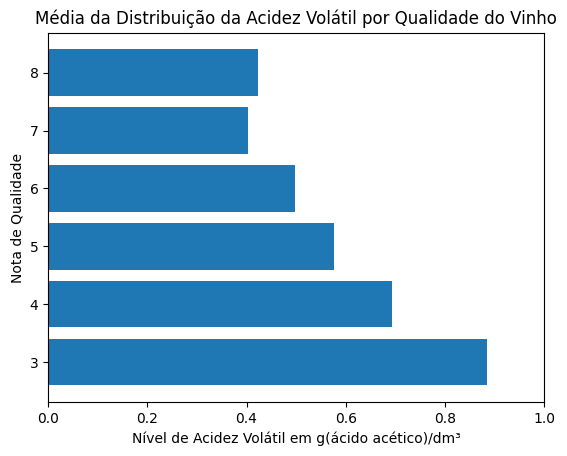

In [8]:
# configurações do gráfico de barras
media_nota = dados.groupby('quality')['volatile acidity'].mean() # distribuição média de acidez volátil por nota de qualidade
fig,ax = plt.subplots()
ax.barh(media_nota.index, media_nota)
ax.set_title('Média da Distribuição da Acidez Volátil por Qualidade do Vinho')
ax.set_xlabel('Nível de Acidez Volátil em g(ácido acético)/dm³')
ax.set_ylabel('Nota de Qualidade')
plt.xlim(0, 1)

plt.show()

O gráfico demonstra a relação entre, a média da acidez volátil e a qualidade do vinho. Percebe-se que a acidez está diretamente relacionada à qualidade do vinho, portanto os vinhos mais bem avaliados, são aqueles com menor índice de acidez.

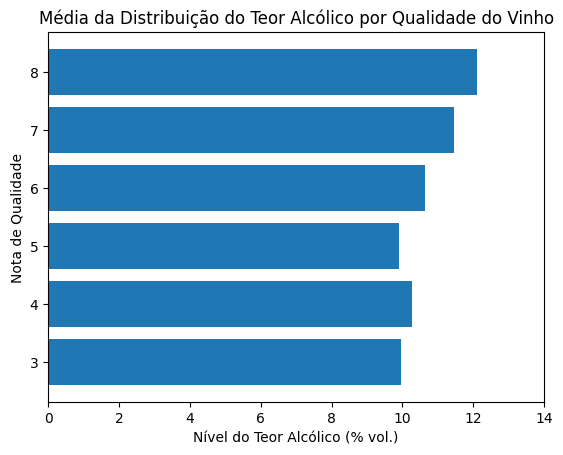

In [19]:
# configurações do gráfico de barras
media_teor_alc = dados.groupby('quality')['alcohol'].mean() # distribuição média do teor alcólico por nota de qualidade
fig,ax = plt.subplots()
ax.barh(media_teor_alc.index, media_teor_alc)
ax.set_title('Média da Distribuição do Teor Alcólico por Qualidade do Vinho')
ax.set_xlabel('Nível do Teor Alcólico (% vol.)')
ax.set_ylabel('Nota de Qualidade')
plt.xlim(0, 14)

plt.show()

Agora é possível ver a relação entre, a qualidade do vinho e seu teor alcoólico. E interpretamos que os vinhos mais bem avaliados, são aqueles com níveis de álcool mais elevado.

In [21]:
# validação entre a correlação de teor alcoólico e qualidade do vinho
correlacao = dados['alcohol'].corr(dados['quality'])
print(correlacao)

0.4761663240011362


Utilizando a correlação de Pearson, é possível identificar que o teor alcoólico possui 47,6% de influência na qualidade do vinho, se tornando um fator importante a ser analisado. 

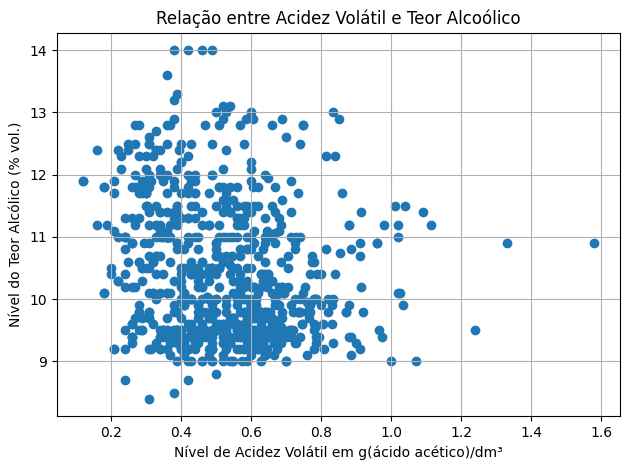

In [13]:
# configurações do gráfico scatter
fig, ax = plt.subplots()
amostra_acidez = dados.sample(frac = 0.5, random_state = 42) # definição de amostra de dados para melhorar a visualização de dados
ax.scatter(amostra_acidez['volatile acidity'], amostra_acidez['alcohol'])

ax.set_xlabel('Nível de Acidez Volátil em g(ácido acético)/dm³')
ax.set_ylabel('Nível do Teor Alcólico (% vol.)')
ax.set_title('Relação entre Acidez Volátil e Teor Alcoólico')

ax.grid(True)
fig.tight_layout()

plt.show()

Acima é demonstrado a relação entre, a acidez volátil e o teor alcoólico. E percebe-se que a acidez volátil possui pouca ou nenhuma influência com relação ao teor alcoólico, pois não existe um padrão seguido na exibição dos dados.

In [18]:
# validação entre a correlação de acidez volátil e teor alcoólico
correlacao = dados['alcohol'].corr(dados['volatile acidity'])
print(correlacao)

-0.20228802715325617


Novamente utilizando a correlação de Pearson, é possível identificar a afirmação de que a acidez não influencia diretamente no teor alcoólico, apresentando um índice de -20% de correlação.